# Lasso Regression

In [1]:
import numpy as np 
from scipy.sparse import random as sprandn
import matplotlib.pyplot as plt

### Problem data

In [2]:
m = 500 	#number of examples
n = 2500	#number of features
A = np.matrix(np.random.randn(m,n))
A = (A-np.mean(A,0))/np.std(A,0) # normalize columns
x_r = sprandn(n,1,density=0.05)
b = A*x_r + np.sqrt(0.001)*np.matrix(np.random.randn(m,1))

# cached computations
AtA  = A.T*A #n*n
Atb  = A.T*b #n*1

### Global constants and defaults

In [3]:
Max_iter = 100
ABSTOL = 1e-3
RELTOL   = 1e-2 #error tolerance for ADMM

# 1.1 Proximal gradient method

In [4]:
def objective(A,x,b,gamma):
	'''
	objective function: f(x) + g(x)
	f(x) = 1/2||Ax-b||^2
	g(x) = gamma*|x|
	A : independt variables m*n
	x : parameters n*1
	b : m*1
	''' 
	return f(A,x,b) + gamma*np.sum(np.abs(x))

def f(A,x,b):
	'''
	f(x) = 1/2||Ax-b||^2 m*1
	'''
	return 0.5*(np.linalg.norm(A*x-b)**2)

In [5]:
def gradf(AtA,x,Atb):
	'''
	gradient of f(X) n*1
	'''
	return AtA*x-Atb 

def uppbd(A,AtA,Atb,x,x_1,b,lamdaK):
	'''
	m*1
	'''
	xDiff = x_1 - x
	return f(A,x,b) + gradf(AtA,x,Atb).T*xDiff + 1.0/(2.0*lamdaK)* np.sum(np.multiply(xDiff,xDiff))
    

In [6]:
def proxop(v,lamdaK):
	'''
	calculate proximal operater
	lamdaK: learning rate
	'''
	zero = np.matrix(np.zeros(np.shape(v)))
	return np.multiply(np.sign(v),np.maximum(np.abs(v)-lamdaK,zero))

In [7]:
def proxgd(Max_iter,lamdaK,gamma,AtA,Atb,A,beta,b,ABSTOL):

	x = np.matrix(np.zeros((np.shape(A)[1],1)))
	
	obj = []
	for k in range(Max_iter):
		while True:
			x_1 = proxop(x-lamdaK*gradf(AtA,x,Atb),lamdaK*gamma)
			if f(A,x_1,b) <= uppbd(A,AtA,Atb,x,x_1,b,lamdaK):
				break
			else:
				lamdaK = beta*lamdaK

		obj.append(objective(A,x_1,b,gamma))

		# terminating condition
		if k > 1 and np.linalg.norm(objective(A,x_1,b,gamma) - objective(A,x,b,gamma)) < ABSTOL:
			break

		x = x_1
	return x_1, obj

In [8]:
if __name__ == '__main__':
	lamdaK = 1
	beta = 0.5 #decreasing parameter for lambda
	# gamma =  0.1*np.linalg.norm(Atb,np.inf) 
	gamma =  0.01

	x_1,obj= proxgd(Max_iter,lamdaK,gamma,AtA,Atb,A,beta,b,ABSTOL)

In [9]:
len(obj)

25

In [10]:
obj

[1728.730022362098,
 576.72762252084499,
 243.40117951752387,
 115.33478518733722,
 58.626951098132658,
 31.323129470569739,
 17.450534258204257,
 10.140355788283632,
 6.1877411929716963,
 4.0100055380999748,
 2.7930870481873189,
 2.1055435215984626,
 1.7136710195347882,
 1.4887032823387121,
 1.3587855774321138,
 1.2833626582240778,
 1.2393833605015667,
 1.2136281614460283,
 1.1984859008714515,
 1.1895488212905294,
 1.1842537512924736,
 1.1811037382297271,
 1.1792214494946511,
 1.1780900566786434,
 1.1774049929679202]

# 1.2 Accelerated proximal gradient method

In [11]:
def AccProxgd(Max_iter,lamdaK,gamma,AtA,Atb,A,beta,b,ABSTOL):

	x = np.matrix(np.zeros((np.shape(A)[1],1)))
	xprev = x
	
	obj = []
	for k in range(Max_iter):
		
		y = x + (1/(k+3)) * (x-xprev)
		
		while True:
			x_1 = proxop(y-lamdaK*gradf(AtA,y,Atb),lamdaK*gamma)
			if f(A,x_1,b) <= uppbd(A,AtA,Atb,y,x_1,b,lamdaK):
				break
			else:
				lamdaK = beta*lamdaK

		obj.append(objective(A,x_1,b,gamma))

		# terminating condition
		if k > 1 and np.linalg.norm(objective(A,x_1,b,gamma) - objective(A,x,b,gamma)) < ABSTOL:
			break

		xprev = x
		x = x_1

	
	return x_1, obj

In [12]:
if __name__ == '__main__':
	lamdaK = 1
	beta = 0.5 #decreasing parameter for lambda
	# gamma =  0.1*np.linalg.norm(Atb,np.inf) 
	gamma =  0.01

	x_1,obj2= AccProxgd(Max_iter,lamdaK,gamma,AtA,Atb,A,beta,b,ABSTOL)

In [13]:
len(obj2)

22

In [14]:
obj2

[1728.730022362098,
 419.3120962214972,
 141.21857910161768,
 58.838543544182571,
 27.696556854337214,
 14.168343104041314,
 7.7957686029415569,
 4.6406878169584518,
 3.0256442243417467,
 2.1788004208018323,
 1.7265442276487084,
 1.4814686865963467,
 1.3470843401860735,
 1.2726502299788547,
 1.2310688579460236,
 1.2076573270245885,
 1.194383359461709,
 1.1868069146176086,
 1.1824546275453953,
 1.1799383044607681,
 1.1784726733223767,
 1.1776114924933554]

# 1.3 ADMM

In [15]:
def proxf(AtA,v,Atb,RELTOL,n):
	'''
	1/2||Ax-b||_2^2
	'''
	return np.linalg.inv(RELTOL*np.identity(n)+AtA)*(Atb+0.01*v)

In [16]:
def ADMM(Max_iter,lamdaK,gamma,AtA,Atb,A,b,ABSTOL,RELTOL,n):
    
	ldr = 1/lamdaK
	x = np.matrix(np.random.randn(n,1))
	z = np.matrix(np.random.randn(n,1))
	u = np.matrix(np.random.randn(n,1))
    
    
	obj = []
	for k in range(Max_iter):
		# update x
		x_1 = proxf(AtA,(z-u),Atb,RELTOL,n)
		# update z
		z_1 = proxop(x_1+u,(lamdaK*gamma)/RELTOL) 
		# update u
		u_1 = u + RELTOL*(x_1 - z_1)
        
		ls = f(A,x_1,b)+ gamma*np.sum(np.abs(z_1))
		obj.append(ls)
        
# 		# terminating condition
# 		xz_norm = np.linalg.norm(x_1-z_1)
# 		zz_norm = np.linalg.norm(-ldr*(z_1 - z))
# 		eps_pri = np.sqrt(n)*ABSTOL + RELTOL*np.maximum(np.linalg.norm(x_1),np.linalg.norm(-z_1))
# 		eps_dual = np.sqrt(n)*ABSTOL + RELTOL*np.linalg.norm(ldr*u_1)
# 		if xz_norm < eps_pri and zz_norm < eps_dual:
# 			break

		lsold = f(A,x,b)+ gamma*np.sum(np.abs(z))
		if k > 1 and np.linalg.norm(ls - lsold) < ABSTOL:
			break

		z = z_1
		x = x_1
		u = u_1        

	return x_1, obj

In [17]:
if __name__ == '__main__':
	lamdaK = 1
	gamma =  0.01

	x_1,obj3 = ADMM(Max_iter,lamdaK,gamma,AtA,Atb,A,b,ABSTOL,RELTOL,n)

In [18]:
len(obj3)

12

In [23]:
obj3

[4.1000416626113472,
 0.8637771830621277,
 0.35702569132190154,
 0.2784994970940563,
 0.26235619218537598,
 0.26117840477367449,
 0.26466010091148912,
 0.26737559294336777,
 0.2707650251735858,
 0.27459662831843151,
 0.27674191919640467,
 0.27763558877287814]

# plots

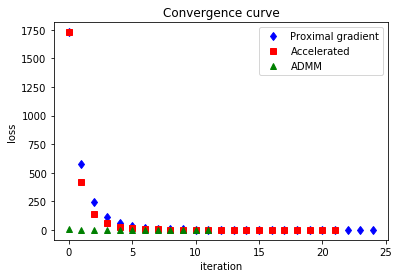

In [24]:
%matplotlib inline

plt.plot(range(len(obj)), obj, 'bd',range(len(obj2)), obj2, 'rs',range(len(obj3)), obj3, 'g^')
plt.title('Convergence curve')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.legend(['Proximal gradient', 'Accelerated','ADMM'], loc='upper right')

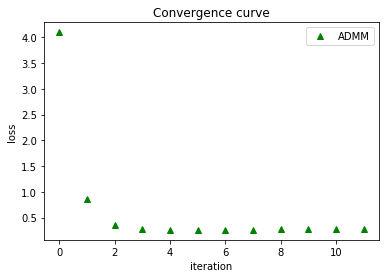

In [25]:
%matplotlib inline
plt.plot(range(len(obj3)), obj3, 'g^')
plt.title('Convergence curve')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(['ADMM'], loc='upper right')

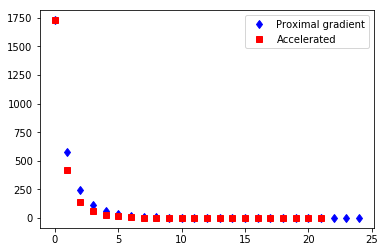

In [26]:
plt.plot(range(len(obj)), obj, 'bd',range(len(obj2)), obj2, 'rs')
plt.legend(['Proximal gradient', 'Accelerated'], loc='upper right')